In [2]:
class Params:
    def __init__(self):
        self.dir='./dataset/IPIN2023_T3_TrainingTrials'
        self.output_dir='./output'
        self.datacache='./datacache'
        
        self.testdata_dir='./dataset/IPIN2023_T3_TestingTrials'
        self.testdata_datacache='./datacache/0testdata'
        
        self.time_window=1 #s
        
p = Params()

In [3]:
# 目前只需要这一个cell
import pandas as pd
import numpy as np
import os

def extract_data_from_txt(lines, dtype, columns):
    data = [line.strip().split(';') for line in lines if line.startswith(dtype)]
    df = pd.DataFrame(data, columns=columns)
    return df

# 创建初始的 DataFrame，包含所需的所有列。
def create_initial_dataframe(filename):
    columns = [
        '来源文件地址',  'POSI的Timestamp(s)', 'POSI的Counter', #'采集设备变量信息',
        'Latitude', 'Longitude', 'floor ID', 'Building ID', '与这一批WIFI数据的时间差(s)',
        '最近一批WIFI数据的AppTimestamp(s)', '最近一批WIFI数据的SensorTimeStamp(s)','20:23:00:00:00:01', '20:23:00:00:00:02', '20:23:00:00:00:03', '20:23:00:00:00:04', '20:23:00:00:00:05', '20:23:00:00:00:06', '20:23:00:00:00:07', '20:23:00:00:00:08', '20:23:00:00:00:09', '20:23:00:00:00:10', '20:23:00:00:00:11', '20:23:00:00:00:12', '20:23:00:00:00:13', '20:23:00:00:00:14', '20:23:00:00:00:15', '20:23:00:00:00:16', '20:23:00:00:00:17', '20:23:00:00:00:18', '20:23:00:00:00:19', '20:23:00:00:00:21', '20:23:00:00:00:22', '20:23:00:00:00:23', '20:23:00:00:00:24', '20:23:00:00:00:25', '20:23:00:00:00:26', '20:23:00:00:00:27', '20:23:00:00:00:28', '20:23:00:00:00:30', '20:23:00:00:00:31', '20:23:00:00:00:34', '20:23:00:00:00:35', '20:23:00:00:00:36', '20:23:00:00:00:37', '20:23:00:00:00:38', '20:23:00:00:00:41', '20:23:00:00:00:42', '20:23:00:00:00:44', '20:23:00:00:00:45', '20:23:00:00:00:46', '20:23:00:00:00:47', '20:23:00:00:00:48', '20:23:00:00:00:49', '20:23:00:00:00:50', '20:23:00:00:00:51', '20:23:00:00:00:52', '20:23:00:00:00:55', '20:23:00:00:00:56', '20:23:00:00:00:57', '20:23:00:00:00:59', '20:23:00:00:00:61', '20:23:00:00:00:62', '20:23:00:00:00:65', '20:23:00:00:00:67', '20:23:00:00:00:68', '20:23:00:00:00:69', '20:23:00:00:00:71', '20:23:00:00:00:72', '20:23:00:00:00:73', '20:23:00:00:00:79', '20:23:00:00:00:80', '20:23:00:00:00:82', '20:23:00:00:00:84', '20:23:00:00:00:88', '20:23:00:00:00:89', '20:23:00:00:00:90', '20:23:00:00:00:91', '20:23:00:00:00:92', '20:23:00:00:00:93', '20:23:00:00:00:94', '20:23:00:00:00:95', '20:23:00:00:00:96', '20:23:00:00:00:97', '20:23:00:00:00:98', '20:23:00:00:00:99', '20:23:00:00:01:00', '20:23:00:00:01:01', '20:23:00:00:01:02', '20:23:00:00:01:03', '20:23:00:00:01:04', '20:23:00:00:01:05', '20:23:00:00:01:06', '20:23:00:00:01:07', '20:23:00:00:01:08', '20:23:00:00:01:09', '20:23:00:00:01:10', '20:23:00:00:01:11', '20:23:00:00:01:12', '20:23:00:00:01:13', '20:23:00:00:01:14', '20:23:00:00:01:15', '20:23:00:00:01:16', '20:23:00:00:01:17', '20:23:00:00:01:18', '20:23:00:00:01:19', '20:23:00:00:01:20', '20:23:00:00:01:21', '20:23:00:00:01:22', '20:23:00:00:01:23', '20:23:00:00:01:24', '20:23:00:00:01:26', '20:23:00:00:01:27', '20:23:00:00:01:28', '20:23:00:00:01:29', '20:23:00:00:01:31', '20:23:00:00:01:32', '20:23:00:00:01:33', '20:23:00:00:01:34', '20:23:00:00:01:35', '20:23:00:00:01:36', '20:23:00:00:01:37', '20:23:00:00:01:38', '20:23:00:00:01:39', '20:23:00:00:01:40', '20:23:00:00:01:41', '20:23:00:00:01:42', '20:23:00:00:01:43', '20:23:00:00:01:44', '20:23:00:00:01:45', '20:23:00:00:01:46', '20:23:00:00:01:47', '20:23:00:00:01:51', '20:23:00:00:01:52', '20:23:00:00:01:54', '20:23:00:00:01:55', '20:23:00:00:01:56', '20:23:00:00:01:58', '20:23:00:00:01:59', '20:23:00:00:01:60', '20:23:00:00:01:62', '20:23:00:00:01:64', '20:23:00:00:01:65', '20:23:00:00:01:66', '20:23:00:00:01:67', '20:23:00:00:01:68', '20:23:00:00:01:69', '20:23:00:00:01:70', '20:23:00:00:01:71', '20:23:00:00:01:72', '20:23:00:00:01:73', '20:23:00:00:01:74', '20:23:00:00:01:75', '20:23:00:00:01:76', '20:23:00:00:01:77', '20:23:00:00:01:81', '20:23:00:00:01:82', '20:23:00:00:01:83', '20:23:00:00:01:84', '20:23:00:00:01:85', '20:23:00:00:01:86', '20:23:00:00:01:87', '20:23:00:00:01:88', '20:23:00:00:01:89', '20:23:00:00:01:90', '20:23:00:00:01:91', '20:23:00:00:01:92', '20:23:00:00:01:93', '20:23:00:00:01:94', '20:23:00:00:01:95', '20:23:00:00:01:96', '20:23:00:00:01:97', '20:23:00:00:01:98', '20:23:00:00:02:01', '20:23:00:00:02:07', '20:23:00:00:02:09', '20:23:00:00:02:10', '20:23:00:00:02:11', '20:23:00:00:02:12', '20:23:00:00:02:14', '20:23:00:00:02:15', '20:23:00:00:02:16', '20:23:00:00:02:17', '20:23:00:00:02:18', '20:23:00:00:02:19', '20:23:00:00:02:20', '20:23:00:00:02:21', '20:23:00:00:02:22', '20:23:00:00:02:23', '20:23:00:00:02:24', '20:23:00:00:02:25', '20:23:00:00:02:26', '20:23:00:00:02:27', '20:23:00:00:02:28', '20:23:00:00:02:29', '20:23:00:00:02:30', '20:23:00:00:02:34', '20:23:00:00:02:35', '20:23:00:00:02:39', '20:23:00:00:02:54', '20:23:00:00:02:55', '20:23:00:00:02:56', '20:23:00:00:02:57', '20:23:00:00:02:58', '20:23:00:00:02:59', '20:23:00:00:02:60', '20:23:00:00:02:61', '20:23:00:00:02:65', '20:23:00:00:02:67', '20:23:00:00:02:70', '20:23:00:00:02:73', '20:23:00:00:02:74', '20:23:00:00:02:82', '20:23:00:00:02:88', '20:23:00:00:02:89', '20:23:00:00:03:08', '20:23:00:00:03:11', '20:23:00:00:03:12', '20:23:00:00:03:13', '20:23:00:00:03:15', '20:23:00:00:03:16', '20:23:00:00:03:17', '20:23:00:00:03:20', '20:23:00:00:03:21', '20:23:00:00:03:22', '20:23:00:00:03:25', '20:23:00:00:03:26', '20:23:00:00:03:27', '20:23:00:00:03:28', '20:23:00:00:03:29', '20:23:00:00:03:30', '20:23:00:00:03:31', '20:23:00:00:03:32', '20:23:00:00:03:33', '20:23:00:00:03:34', '20:23:00:00:03:35', '20:23:00:00:03:36', '20:23:00:00:03:37', '20:23:00:00:03:38', '20:23:00:00:03:39', '20:23:00:00:03:40', '20:23:00:00:03:41', '20:23:00:00:03:42', '20:23:00:00:03:43', '20:23:00:00:03:44', '20:23:00:00:03:45', '20:23:00:00:03:46', '20:23:00:00:03:47', '20:23:00:00:03:48', 
        ]
    df = pd.DataFrame(columns=columns)
    df['来源文件地址'] = filename
    return df

# 处理每个 POSI 数据行，并根据最近的 WIFI 数据填充 DataFrame。
def process_wifi_data_for_posi_corrected(df_posi, df_wifi, df, filename):
    rows_to_append = []  # Use a list to append rows to the dataframe, which is more efficient
    for _, posi_row in df_posi.iterrows():
        new_row = {
            '来源文件地址': filename,  # 使用传递的 filename 参数
            # '采集设备变量信息': '',
            'POSI的Timestamp(s)': posi_row['Timestamp(s)'],
            'POSI的Counter': posi_row['Counter'],
            'Latitude': posi_row['Latitude'],
            'Longitude': posi_row['Longitude'],
            'floor ID': posi_row['floor ID'],
            'Building ID': posi_row['Building ID'],
        }
        posi_timestamp = float(posi_row['Timestamp(s)'])
        closest_wifi_batch = df_wifi[np.abs(df_wifi['AppTimestamp(s)'].astype(float) - posi_timestamp) <= p.time_window]
        #按照时间戳与posi_timestamp的差值进行排序。再用 closest_wifi_batch['AppTimestamp(s)'].iloc[0] 来获取最近的wifi时间戳。
        closest_wifi_batch = closest_wifi_batch.iloc[(closest_wifi_batch['AppTimestamp(s)'].astype(float) - posi_timestamp).abs().argsort()]
        if not closest_wifi_batch.empty:
            closest_timestamp = closest_wifi_batch['AppTimestamp(s)'].iloc[0]
            closest_wifi_batch = closest_wifi_batch[closest_wifi_batch['AppTimestamp(s)'] == closest_timestamp]
            new_row['与这一批WIFI数据的时间差(s)'] = abs(posi_timestamp - float(closest_timestamp))
            new_row['最近一批WIFI数据的AppTimestamp(s)'] = closest_timestamp
            new_row['最近一批WIFI数据的SensorTimeStamp(s)'] = closest_wifi_batch['SensorTimeStamp(s)'].iloc[0]
            
            # # 使用 MAC_BSSID 的最后五个字符作为列名。
            # for _, wifi_row in closest_wifi_batch.iterrows():
            #     bssid_end = wifi_row['MAC_BSSID'][-5:]
            #     freq = int(wifi_row['Frequency'])
            #     freq_str = '(2.4G)' if freq < 3000 else '(5G)'
            #     column_name = f"{bssid_end}{freq_str}"
            #     if column_name in df.columns:
            #         new_row[column_name] = wifi_row['RSS(dBm)']
            
            # 使用 MAC_BSSID 作为列名
            for _, wifi_row in closest_wifi_batch.iterrows():
                column_name = wifi_row['MAC_BSSID']
                if column_name in df.columns:
                    new_row[column_name] = wifi_row['RSS(dBm)']

        # df = df.append(new_row, ignore_index=True)
        
        # print(new_row)
        # print(len(new_row))
        rows_to_append.append(new_row)  # 在每次迭代中将新行添加到列表中
        # print(rows_to_append)
        # print(len(rows_to_append))
    

    # 将新行列表转换为DataFrame并追加到df中
    df = pd.concat([df, pd.DataFrame(rows_to_append)], ignore_index=True)
    return df

def process_all_files_in_directory(directory_path):
    all_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)) and f.endswith(".txt")]
    main_df = pd.DataFrame()  # 初始化一个空的主数据框

    for _filename in all_files:
        # print("start processing file ：" + _filename)
        full_path = os.path.join(directory_path, _filename)
        with open(full_path, 'r') as file:
            lines = file.readlines()

        # 提取 WIFI 和 POSI 数据
        df_wifi = extract_data_from_txt(lines, 'WIFI', columns=['Type', 'AppTimestamp(s)', 'SensorTimeStamp(s)',
                                        'Name_SSID', 'MAC_BSSID', 'Frequency', 'RSS(dBm)'])
        df_posi = extract_data_from_txt(lines, 'POSI', columns=['Type', 'Timestamp(s)', 'Counter', 
                                        'Latitude', 'Longitude',
                                        'floor ID', 'Building ID'])

        # 创建初始的 dataframe
        df = create_initial_dataframe(full_path)
        # 处理数据并填充 dataframe
        # df = process_wifi_data_for_posi_corrected(df_posi, df_wifi, df)
        df = process_wifi_data_for_posi_corrected(df_posi, df_wifi, df, _filename)
        df.fillna(-100, inplace=True)
        # 将处理后的数据框添加到主数据框
        # print(df)
        main_df = pd.concat([main_df, df], ignore_index=True)
        # print(main_df)
    return main_df

# 处理目录中的所有文件
merged_df = process_all_files_in_directory(p.dir)

# 将合并的 dataframe 保存为 CSV 文件
merged_df.to_csv(f"{p.output_dir}/fingerprint_train.csv", index=False)
print("train data is prepared !")


merged_df_test = process_all_files_in_directory(p.testdata_dir)
merged_df_test.to_csv(f"{p.output_dir}/fingerprint_test.csv", index=False)
print("test data is prepared !!!")

start processing file ：IPIN2023_T3_TrainingTrial51_repetition02.txt
start processing file ：IPIN2023_T3_TrainingTrial26_repetition03.txt
start processing file ：IPIN2023_T3_TrainingTrial23_repetition02.txt
start processing file ：IPIN2023_T3_TrainingTrial27_repetition04.txt
start processing file ：IPIN2023_T3_TrainingTrial52_repetition02.txt
start processing file ：IPIN2023_T3_TrainingTrial26_repetition04.txt
start processing file ：IPIN2023_T3_TrainingTrial23_repetition04.txt
start processing file ：IPIN2023_T3_TrainingTrial04_repetition02.txt
start processing file ：IPIN2023_T3_TrainingTrial01_repetition02.txt
start processing file ：IPIN2023_T3_TrainingTrial23_repetition03.txt
start processing file ：IPIN2023_T3_TrainingTrial25_repetition04.txt
start processing file ：IPIN2023_T3_TrainingTrial05_repetition01.txt
start processing file ：IPIN2023_T3_TrainingTrial04_repetition03.txt
start processing file ：IPIN2023_T3_TrainingTrial27_repetition03.txt
start processing file ：IPIN2023_T3_TrainingTrial

In [4]:
# 如果closest_wifi_batch为空，则不将新行添加到rows_to_append列表中。这样只有在找到匹配的WIFI数据时，POSI行才会被保存。
import pandas as pd
import numpy as np
import os

def extract_data_from_txt(lines, dtype, columns):
    data = [line.strip().split(';') for line in lines if line.startswith(dtype)]
    df = pd.DataFrame(data, columns=columns)
    return df

# 创建初始的 DataFrame，包含所需的所有列。
def create_initial_dataframe(filename):
    columns = [
        '来源文件地址',  'POSI的Timestamp(s)', 'POSI的Counter', #'采集设备变量信息',
        'Latitude', 'Longitude', 'floor ID', 'Building ID', '与这一批WIFI数据的时间差(s)',
        '最近一批WIFI数据的AppTimestamp(s)', '最近一批WIFI数据的SensorTimeStamp(s)','20:23:00:00:00:01', '20:23:00:00:00:02', '20:23:00:00:00:03', '20:23:00:00:00:04', '20:23:00:00:00:05', '20:23:00:00:00:06', '20:23:00:00:00:07', '20:23:00:00:00:08', '20:23:00:00:00:09', '20:23:00:00:00:10', '20:23:00:00:00:11', '20:23:00:00:00:12', '20:23:00:00:00:13', '20:23:00:00:00:14', '20:23:00:00:00:15', '20:23:00:00:00:16', '20:23:00:00:00:17', '20:23:00:00:00:18', '20:23:00:00:00:19', '20:23:00:00:00:21', '20:23:00:00:00:22', '20:23:00:00:00:23', '20:23:00:00:00:24', '20:23:00:00:00:25', '20:23:00:00:00:26', '20:23:00:00:00:27', '20:23:00:00:00:28', '20:23:00:00:00:30', '20:23:00:00:00:31', '20:23:00:00:00:34', '20:23:00:00:00:35', '20:23:00:00:00:36', '20:23:00:00:00:37', '20:23:00:00:00:38', '20:23:00:00:00:41', '20:23:00:00:00:42', '20:23:00:00:00:44', '20:23:00:00:00:45', '20:23:00:00:00:46', '20:23:00:00:00:47', '20:23:00:00:00:48', '20:23:00:00:00:49', '20:23:00:00:00:50', '20:23:00:00:00:51', '20:23:00:00:00:52', '20:23:00:00:00:55', '20:23:00:00:00:56', '20:23:00:00:00:57', '20:23:00:00:00:59', '20:23:00:00:00:61', '20:23:00:00:00:62', '20:23:00:00:00:65', '20:23:00:00:00:67', '20:23:00:00:00:68', '20:23:00:00:00:69', '20:23:00:00:00:71', '20:23:00:00:00:72', '20:23:00:00:00:73', '20:23:00:00:00:79', '20:23:00:00:00:80', '20:23:00:00:00:82', '20:23:00:00:00:84', '20:23:00:00:00:88', '20:23:00:00:00:89', '20:23:00:00:00:90', '20:23:00:00:00:91', '20:23:00:00:00:92', '20:23:00:00:00:93', '20:23:00:00:00:94', '20:23:00:00:00:95', '20:23:00:00:00:96', '20:23:00:00:00:97', '20:23:00:00:00:98', '20:23:00:00:00:99', '20:23:00:00:01:00', '20:23:00:00:01:01', '20:23:00:00:01:02', '20:23:00:00:01:03', '20:23:00:00:01:04', '20:23:00:00:01:05', '20:23:00:00:01:06', '20:23:00:00:01:07', '20:23:00:00:01:08', '20:23:00:00:01:09', '20:23:00:00:01:10', '20:23:00:00:01:11', '20:23:00:00:01:12', '20:23:00:00:01:13', '20:23:00:00:01:14', '20:23:00:00:01:15', '20:23:00:00:01:16', '20:23:00:00:01:17', '20:23:00:00:01:18', '20:23:00:00:01:19', '20:23:00:00:01:20', '20:23:00:00:01:21', '20:23:00:00:01:22', '20:23:00:00:01:23', '20:23:00:00:01:24', '20:23:00:00:01:26', '20:23:00:00:01:27', '20:23:00:00:01:28', '20:23:00:00:01:29', '20:23:00:00:01:31', '20:23:00:00:01:32', '20:23:00:00:01:33', '20:23:00:00:01:34', '20:23:00:00:01:35', '20:23:00:00:01:36', '20:23:00:00:01:37', '20:23:00:00:01:38', '20:23:00:00:01:39', '20:23:00:00:01:40', '20:23:00:00:01:41', '20:23:00:00:01:42', '20:23:00:00:01:43', '20:23:00:00:01:44', '20:23:00:00:01:45', '20:23:00:00:01:46', '20:23:00:00:01:47', '20:23:00:00:01:51', '20:23:00:00:01:52', '20:23:00:00:01:54', '20:23:00:00:01:55', '20:23:00:00:01:56', '20:23:00:00:01:58', '20:23:00:00:01:59', '20:23:00:00:01:60', '20:23:00:00:01:62', '20:23:00:00:01:64', '20:23:00:00:01:65', '20:23:00:00:01:66', '20:23:00:00:01:67', '20:23:00:00:01:68', '20:23:00:00:01:69', '20:23:00:00:01:70', '20:23:00:00:01:71', '20:23:00:00:01:72', '20:23:00:00:01:73', '20:23:00:00:01:74', '20:23:00:00:01:75', '20:23:00:00:01:76', '20:23:00:00:01:77', '20:23:00:00:01:81', '20:23:00:00:01:82', '20:23:00:00:01:83', '20:23:00:00:01:84', '20:23:00:00:01:85', '20:23:00:00:01:86', '20:23:00:00:01:87', '20:23:00:00:01:88', '20:23:00:00:01:89', '20:23:00:00:01:90', '20:23:00:00:01:91', '20:23:00:00:01:92', '20:23:00:00:01:93', '20:23:00:00:01:94', '20:23:00:00:01:95', '20:23:00:00:01:96', '20:23:00:00:01:97', '20:23:00:00:01:98', '20:23:00:00:02:01', '20:23:00:00:02:07', '20:23:00:00:02:09', '20:23:00:00:02:10', '20:23:00:00:02:11', '20:23:00:00:02:12', '20:23:00:00:02:14', '20:23:00:00:02:15', '20:23:00:00:02:16', '20:23:00:00:02:17', '20:23:00:00:02:18', '20:23:00:00:02:19', '20:23:00:00:02:20', '20:23:00:00:02:21', '20:23:00:00:02:22', '20:23:00:00:02:23', '20:23:00:00:02:24', '20:23:00:00:02:25', '20:23:00:00:02:26', '20:23:00:00:02:27', '20:23:00:00:02:28', '20:23:00:00:02:29', '20:23:00:00:02:30', '20:23:00:00:02:34', '20:23:00:00:02:35', '20:23:00:00:02:39', '20:23:00:00:02:54', '20:23:00:00:02:55', '20:23:00:00:02:56', '20:23:00:00:02:57', '20:23:00:00:02:58', '20:23:00:00:02:59', '20:23:00:00:02:60', '20:23:00:00:02:61', '20:23:00:00:02:65', '20:23:00:00:02:67', '20:23:00:00:02:70', '20:23:00:00:02:73', '20:23:00:00:02:74', '20:23:00:00:02:82', '20:23:00:00:02:88', '20:23:00:00:02:89', '20:23:00:00:03:08', '20:23:00:00:03:11', '20:23:00:00:03:12', '20:23:00:00:03:13', '20:23:00:00:03:15', '20:23:00:00:03:16', '20:23:00:00:03:17', '20:23:00:00:03:20', '20:23:00:00:03:21', '20:23:00:00:03:22', '20:23:00:00:03:25', '20:23:00:00:03:26', '20:23:00:00:03:27', '20:23:00:00:03:28', '20:23:00:00:03:29', '20:23:00:00:03:30', '20:23:00:00:03:31', '20:23:00:00:03:32', '20:23:00:00:03:33', '20:23:00:00:03:34', '20:23:00:00:03:35', '20:23:00:00:03:36', '20:23:00:00:03:37', '20:23:00:00:03:38', '20:23:00:00:03:39', '20:23:00:00:03:40', '20:23:00:00:03:41', '20:23:00:00:03:42', '20:23:00:00:03:43', '20:23:00:00:03:44', '20:23:00:00:03:45', '20:23:00:00:03:46', '20:23:00:00:03:47', '20:23:00:00:03:48', 
        ]
    df = pd.DataFrame(columns=columns)
    df['来源文件地址'] = filename
    return df

# 处理每个 POSI 数据行，并根据最近的 WIFI 数据填充 DataFrame。 修改内容为如果没匹配到,就不添加
def process_wifi_data_for_posi_corrected(df_posi, df_wifi, df, filename, time_window):
    rows_to_append = []  
    for _, posi_row in df_posi.iterrows():
        new_row = {
            '来源文件地址': filename,  
            'POSI的Timestamp(s)': posi_row['Timestamp(s)'],
            'POSI的Counter': posi_row['Counter'],
            'Latitude': posi_row['Latitude'],
            'Longitude': posi_row['Longitude'],
            'floor ID': posi_row['floor ID'],
            'Building ID': posi_row['Building ID'],
        }
        posi_timestamp = float(posi_row['Timestamp(s)'])
        closest_wifi_batch = df_wifi[np.abs(df_wifi['AppTimestamp(s)'].astype(float) - posi_timestamp) <= time_window]
        closest_wifi_batch = closest_wifi_batch.iloc[(closest_wifi_batch['AppTimestamp(s)'].astype(float) - posi_timestamp).abs().argsort()]
        if not closest_wifi_batch.empty:
            closest_timestamp = closest_wifi_batch['AppTimestamp(s)'].iloc[0]
            closest_wifi_batch = closest_wifi_batch[closest_wifi_batch['AppTimestamp(s)'] == closest_timestamp]
            new_row['与这一批WIFI数据的时间差(s)'] = abs(posi_timestamp - float(closest_timestamp))
            new_row['最近一批WIFI数据的AppTimestamp(s)'] = closest_timestamp
            new_row['最近一批WIFI数据的SensorTimeStamp(s)'] = closest_wifi_batch['SensorTimeStamp(s)'].iloc[0]
            for _, wifi_row in closest_wifi_batch.iterrows():
                column_name = wifi_row['MAC_BSSID']
                if column_name in df.columns:
                    new_row[column_name] = wifi_row['RSS(dBm)']
            rows_to_append.append(new_row)
    df = pd.concat([df, pd.DataFrame(rows_to_append)], ignore_index=True)
    return df

def process_all_files_in_directory(directory_path):
    all_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)) and f.endswith(".txt")]
    main_df = pd.DataFrame() 
    for _filename in all_files:
        # print("start processing file ：" + _filename)
        full_path = os.path.join(directory_path, _filename)
        with open(full_path, 'r') as file:
            lines = file.readlines()
        df_wifi = extract_data_from_txt(lines, 'WIFI', columns=['Type', 'AppTimestamp(s)', 'SensorTimeStamp(s)','Name_SSID', 'MAC_BSSID', 'Frequency', 'RSS(dBm)'])
        df_posi = extract_data_from_txt(lines, 'POSI', columns=['Type', 'Timestamp(s)', 'Counter','Latitude', 'Longitude','floor ID', 'Building ID'])
        df = create_initial_dataframe(full_path)
        df = process_wifi_data_for_posi_corrected(df_posi, df_wifi, df, _filename, p.time_window)
        df.fillna(-100, inplace=True)
        main_df = pd.concat([main_df, df], ignore_index=True)
    return main_df

merged_df = process_all_files_in_directory(p.dir)

merged_df.to_csv(f"{p.output_dir}/fingerprint_train.csv", index=False)
print("train data is prepared !")


merged_df_test = process_all_files_in_directory(p.testdata_dir)
merged_df_test.to_csv(f"{p.output_dir}/fingerprint_test.csv", index=False)
print("test data is prepared !!!")

TypeError: process_wifi_data_for_posi_corrected() missing 1 required positional argument: 'time_window'

# 以下暂时作废

In [12]:
# import and functions
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import get_sub_files

from typing import List, Dict
def read_and_preprocess_to_df(file_path: str) -> Dict[str, pd.DataFrame]:#给一个文件地址，出一个字典
    local_data_frames = {}
    
    # Define column names for each sensor type
    column_names = {
        'ACCE': ['AppTimestamp', 'SensorTimestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Accuracy'],
        'GYRO': ['AppTimestamp', 'SensorTimestamp', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Accuracy'],
        'MAGN': ['AppTimestamp', 'SensorTimestamp', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Accuracy'],
        'AHRS': ['AppTimestamp', 'SensorTimestamp', 'PitchX', 'RollY', 'YawZ', 'Quat2', 'Quat3', 'Quat4', 'Accuracy'],
        'WIFI': ['AppTimestamp', 'SensorTimestamp', 'Name_SSID', 'MAC_BSSID', 'Frequency', 'RSS'],
        'IMUX': ['AppTimestamp', 'SensorTimestamp', 'Counter', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Roll', 'Pitch', 'Yaw', 'Quat1', 'Quat2', 'Quat3', 'Quat4', 'Pressure', 'Temperature'],
        'IMUL': ['AppTimestamp', 'SensorTimestamp', 'Counter', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Roll', 'Pitch', 'Yaw', 'Quat1', 'Quat2', 'Quat3', 'Quat4', 'Pressure', 'Temperature'],
        'IMUI': ['AppTimestamp', 'Packet_count', 'Step_Counter', 'delta_X', 'delta_Y', 'delta_Z', 'delta_theta', 'Covariance'],
        'POSI': ['Timestamp', 'Counter', 'Latitude', 'Longitude', 'floor_ID', 'Building_ID']
    }
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line and not line.startswith('%'):
                fields = line.split(';')
                sensor_type = fields[0]
                
                if sensor_type not in local_data_frames:
                    local_data_frames[sensor_type] = []
                
                local_data_frames[sensor_type].append(fields[1:])
                
    # # Convert lists to DataFrames and assign column names
    # for key, value in local_data_frames.items():
    #     local_data_frames[key] = pd.DataFrame(value, columns=column_names.get(key, ["Unknown"]))
    
    # Convert lists to DataFrames and assign column names
    for key, value in local_data_frames.items():
        expected_columns = column_names.get(key, ["Unknown"])
        actual_columns = len(value[0]) if value else 0  # Check the number of columns in the first row of data
        if len(expected_columns) != actual_columns:
            print(f"Warning: Mismatch in number of columns for {key}. Expected {len(expected_columns)}, got {actual_columns}.")
        else:
            local_data_frames[key] = pd.DataFrame(value, columns=expected_columns)

        
    return local_data_frames

def find_nearest_wifi_data(posi_df, wifi_df, unique_id):
    posi_row = posi_df[posi_df['unique_id'] == unique_id].iloc[0]
    posi_timestamp = float(posi_row['Timestamp'])
    # wifi_df_copy = wifi_df.copy() # Create a copy to prevent modification of the original dataframe
    wifi_df['AppTimestamp'] = wifi_df['AppTimestamp'].astype(float)
    closest_wifi_batch = wifi_df.iloc[(wifi_df['AppTimestamp'] - posi_timestamp).abs().argsort()] #abs
    if closest_wifi_batch.empty:
        return None, None
    closest_wifi_timestamp = closest_wifi_batch.iloc[0]['AppTimestamp'] # Find closest WIFI data
    closest_wifi_data_batch = closest_wifi_batch[closest_wifi_batch['AppTimestamp'] == closest_wifi_timestamp] # Get all the WIFI data having the closest timestamp
    time_diff = closest_wifi_timestamp - posi_timestamp
    # print(f"POSI Timestamp: {posi_timestamp},  Time Difference: {time_diff}")
    return closest_wifi_data_batch, time_diff

# def find_nearest_wifi_data(posi_df, wifi_df, unique_id):
#     posi_row = posi_df[posi_df['unique_id'] == unique_id].iloc[0]
#     posi_timestamp = float(posi_row['Timestamp'])
    
#     # 确保WIFI数据的时间戳被转换为浮点数
#     wifi_df['AppTimestamp'] = wifi_df['AppTimestamp'].astype(float)
    
#     # 首先找到与POSI时间戳相差不超过2秒的所有WIFI数据
#     wifi_within_time_window = wifi_df[np.abs(wifi_df['AppTimestamp'] - posi_timestamp) <= 2]
    
#     # 如果没有找到符合条件的WIFI数据，则返回None
#     if wifi_within_time_window.empty:
#         return None, None
    
#     # 从这个时间窗内的WIFI数据中找到最接近POSI时间戳的那个时间戳
#     closest_wifi_timestamp = wifi_within_time_window.iloc[(wifi_within_time_window['AppTimestamp'] - posi_timestamp).abs().argsort()].iloc[0]['AppTimestamp']
    
#     # 选择所有具有这个最接近时间戳的WIFI数据
#     closest_wifi_data_batch = wifi_within_time_window[wifi_within_time_window['AppTimestamp'] == closest_wifi_timestamp]
    
#     # 计算时间差
#     time_diff = closest_wifi_timestamp - posi_timestamp
    
#     return closest_wifi_data_batch, time_diff


def find_sensor_data_within_interval(sensor_df, start_timestamp, end_timestamp):
    sensor_df['AppTimestamp'] = sensor_df['AppTimestamp'].astype(float)
    filtered_sensor_data = sensor_df[(sensor_df['AppTimestamp'] >= start_timestamp) & (sensor_df['AppTimestamp'] <= end_timestamp)]
    return filtered_sensor_data

def save_sensor_data_to_txt(all_sensor_data, filename):
    with open(filename, 'w') as f:
        for index, row in all_sensor_data.iterrows():
            sensor_type = row['SensorType']
            other_data = row.drop('SensorType')
            line = f"{sensor_type};{';'.join(other_data.astype(str).values)}"
            f.write(line + '\n')


# 以下是多文件循环

In [14]:
# 对train文件夹做处理
sub_files = get_sub_files(p.dir) #得到的是文件夹内所有文件的地址

next_unique_id = 0  # 全局变量，用于跟踪下一个可用的unique_id

data_list_to_extract=['ACCE','GYRO','MAGN'] #需要抽取的sensor类型
all_posi_data = pd.DataFrame()

for item in sub_files:
    print("正在处理文件：",item,"...")
    
    dict=read_and_preprocess_to_df(item)
    
    if 'POSI' in dict:
        num_rows = len(dict['POSI'])
        dict['POSI']['unique_id'] = range(next_unique_id, next_unique_id + num_rows)
        
    for unique_id in dict['POSI']['unique_id']:
        all_sensor_data = pd.DataFrame()
        
        nearest_wifi_data_batch, time_diff = find_nearest_wifi_data(dict['POSI'], dict['WIFI'], unique_id)
        
        # 保存 time_diff 依据 current unique_id
        dict['POSI'].loc[dict['POSI']['unique_id'] == unique_id, 'time_diff'] = time_diff
        
        if nearest_wifi_data_batch is not None:
            posi_timestamp = float(dict['POSI'][dict['POSI']['unique_id'] == unique_id].iloc[0]['Timestamp'])
            closest_wifi_timestamp = float(nearest_wifi_data_batch['AppTimestamp'].min())
            
            start_timestamp = min(posi_timestamp, closest_wifi_timestamp)
            end_timestamp = max(posi_timestamp, closest_wifi_timestamp)
            
            for sensor_type in data_list_to_extract:
                if sensor_type in dict:
                    sensor_data = find_sensor_data_within_interval(dict[sensor_type], start_timestamp, end_timestamp).copy()
                    sensor_data['SensorType'] = sensor_type
                    all_sensor_data = pd.concat([all_sensor_data, sensor_data])

            sensor_filename = f"{p.datacache}/sensor/all_sensor_data_{unique_id}.txt"
            save_sensor_data_to_txt(all_sensor_data, sensor_filename)

            wifi_filename = f'{p.datacache}/wifi/wifi_data_{unique_id}.csv'        
            nearest_wifi_data_batch.to_csv(wifi_filename, index=False)
            pass
        else:
            print(f"No WIFI data within 2s for POSI data with unique_id {unique_id}. Skipping this POSI data point or taking alternative action.")
            # 这里可以选择跳过该POSI数据点，或者根据您的需求做其他处理。
            continue  # 如果选择跳过，则使用continue语句。

    next_unique_id += num_rows
    all_posi_data = pd.concat([all_posi_data, dict['POSI']])

all_posi_data.to_csv(f"{p.datacache}/posi/posi_with_id.csv", index=False)

print("抽取完事儿！")


Number of files in this dir: 53
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial51_repetition02.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial26_repetition03.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial23_repetition02.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial27_repetition04.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial52_repetition02.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial26_repetition04.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial23_repetition04.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial04_repetition02.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial01_repetition02.txt ...
正在处理文件： ./dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial23_repetition03.txt ...
正在处理文件： ./dataset/IPIN2023_T

In [13]:
df = pd.read_csv(f"{p.datacache}/posi/posi_with_id.csv")
stats = df['time_diff'].describe()
print("Statistics for 'time_diff' column:")
print(stats)

Statistics for 'time_diff' column:
count    762.000000
mean       0.038679
std        0.946563
min       -2.258600
25%       -0.678700
50%        0.118850
75%        0.722400
max        2.010800
Name: time_diff, dtype: float64


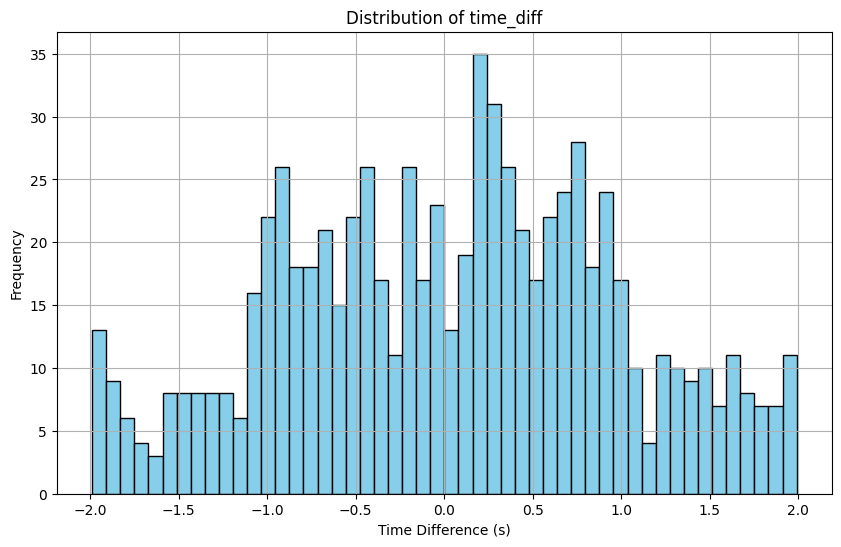

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(f"{p.datacache}/posi/posi_with_id.csv")


plt.figure(figsize=(10, 6))
plt.hist(df['time_diff'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of time_diff')
plt.xlabel('Time Difference (s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:
# 统计都是-100的posi数据
df = pd.read_csv('/home/llmnav/chaoyi/ipin/IPIN2023T3/datacache/test/fingerprint_database.csv')
df=df.drop(['Latitude', 'Longitude', 'floor ID'], axis=1, inplace=False)
df.columns
# columns_to_check = ['col1', 'col2', 'col3']  # 请替换为实际的列名
count = (df[df.columns] == -100).all(axis=1).sum()
count

3

In [2]:
# 对test文件夹做处理
sub_files = get_sub_files(p.testdata_dir) #得到的是文件夹内所有文件的地址
print(sub_files)
sub_files.remove('./dataset/IPIN2023_T3_TestingTrials/IPIN2023_T3_TestingTrials.inipos.txt')

next_unique_id = 0  # 全局变量，用于跟踪下一个可用的unique_id

data_list_to_extract=['ACCE','GYRO','MAGN'] #需要抽取的sensor类型
all_posi_data = pd.DataFrame() 

for item in sub_files:
    print("正在处理文件：",item,"...")
    
    dict=read_and_preprocess_to_df(item)  #字典！
    
    if 'POSI' in dict: #为POSI数据添加唯一标识码
        num_rows = len(dict['POSI'])
        dict['POSI']['unique_id'] = range(next_unique_id, next_unique_id + num_rows)
        
    for unique_id in dict['POSI']['unique_id']: # Loop through each POSI data row
        all_sensor_data = pd.DataFrame()
        
        nearest_wifi_data_batch, time_diff = find_nearest_wifi_data(dict['POSI'], dict['WIFI'], unique_id)
        
        # 保存 time_diff 依据 current unique_id
        dict['POSI'].loc[dict['POSI']['unique_id'] == unique_id, 'time_diff'] = time_diff
        
        if nearest_wifi_data_batch is not None:
            posi_timestamp = float(dict['POSI'][dict['POSI']['unique_id'] == unique_id].iloc[0]['Timestamp'])
            closest_wifi_timestamp = float(nearest_wifi_data_batch['AppTimestamp'].min())
            
            start_timestamp = min(posi_timestamp, closest_wifi_timestamp)
            end_timestamp = max(posi_timestamp, closest_wifi_timestamp)
            
            for sensor_type in data_list_to_extract:
                if sensor_type in dict:
                    sensor_data = find_sensor_data_within_interval(dict[sensor_type], start_timestamp, end_timestamp).copy()
                    sensor_data['SensorType'] = sensor_type
                    all_sensor_data = pd.concat([all_sensor_data, sensor_data])

            sensor_filename = f"{p.testdata_datacache}/sensor/all_sensor_data_{unique_id}.txt"
            save_sensor_data_to_txt(all_sensor_data, sensor_filename)

            wifi_filename = f'{p.testdata_datacache}/wifi/wifi_data_{unique_id}.csv'        
            nearest_wifi_data_batch.to_csv(wifi_filename, index=False)
            
    next_unique_id += num_rows  # 更新全局变量以供下一个文件使用
    all_posi_data = pd.concat([all_posi_data, dict['POSI']])  # Add to the global POSI data DataFrame
   
all_posi_data.to_csv(f"{p.testdata_datacache}/posi/posi_with_id.csv", index=False)

print("抽取完事儿！")

NameError: name 'get_sub_files' is not defined

In [14]:
df = pd.read_csv(f"{p.testdata_datacache}/posi/posi_with_id.csv")
stats = df['time_diff'].describe()
print("Statistics for 'time_diff' column:")
print(stats)

Statistics for 'time_diff' column:
count    112.000000
mean      -0.245184
std        0.982134
min       -2.018400
25%       -0.952150
50%       -0.320150
75%        0.595550
max        1.944900
Name: time_diff, dtype: float64


# 以下是单文件调试

In [4]:
sub_files = get_sub_files(p.dir) #得到的是文件夹内所有文件的地址
files=sub_files[0]
print(files)
print("======================")
# 这个循环留着，单个文件成功后，再添加这个循环
# for item in sub_files:
#     print(item)
    # break

dict=read_and_preprocess_to_df(files)  #字典！
print("======================")
for key, value in dict.items():
    print(f"{key}: {len(value)} records")
    
    if(key=='PROX'): 
        print("===")
        print(value)
    if(key=='POSI'): 
        print("===")
        print(value)



Number of files in this dir: 53
/home/llmnav/chaoyi/ipin/IPIN2023T3/dataset/IPIN2023_T3_TrainingTrials/IPIN2023_T3_TrainingTrial51_repetition02.txt
ACCE: 15078 records
MAGN: 15078 records
GYRO: 15078 records
AHRS: 15078 records
PRES: 3016 records
LIGH: 1675 records
GNSS: 586 records
BLE4: 619 records
SOUN: 603 records
WIFI: 2210 records
PROX: 2 records
===
[['16.6285', '9625.6917', '0.0', '3'], ['16.7450', '9625.8090', '8.0', '3']]
POSI: 16 records
===
   Timestamp Counter         Latitude        Longitude floor_ID Building_ID
0     61.468       1  49.461221918752  11.111590101028        0         100
1    82.5749       2  49.461219385271  11.111628329564       -1         100
2    93.4227       3  49.461322924780  11.111567743893       -1         100
3   108.1969       4  49.461293987132  11.111548064557       -2         100
4   125.9584       5  49.461293987132  11.111548064557       -2         100
5   139.5206       6  49.461322924780  11.111567743893       -1         100
6   150.823

In [5]:
next_unique_id = 0  # 全局变量，用于跟踪下一个可用的unique_id

#为POSI数据添加唯一标识码
if 'POSI' in dict:
    num_rows = len(dict['POSI'])
    dict['POSI']['unique_id'] = range(next_unique_id, next_unique_id + num_rows)
    
    next_unique_id += num_rows  # 更新全局变量以供下一个文件使用

# print(dict['POSI']['unique_id'])
print(dict['POSI'])

   Timestamp Counter         Latitude        Longitude floor_ID Building_ID  \
0     61.468       1  49.461221918752  11.111590101028        0         100   
1    82.5749       2  49.461219385271  11.111628329564       -1         100   
2    93.4227       3  49.461322924780  11.111567743893       -1         100   
3   108.1969       4  49.461293987132  11.111548064557       -2         100   
4   125.9584       5  49.461293987132  11.111548064557       -2         100   
5   139.5206       6  49.461322924780  11.111567743893       -1         100   
6   150.8236       7  49.461219385271  11.111628329564       -1         100   
7   169.4015       8  49.461221918752  11.111590101028        0         100   
8   196.0381       9  49.461221918752  11.111590101028        0         100   
9   215.3948      10  49.461219385271  11.111628329564       -1         100   
10  226.3328      11  49.461322924780  11.111567743893       -1         100   
11  240.2368      12  49.461293987132  11.1115480645

NameError: name 'stop' is not defined

In [53]:
# data_list_to_extract=['ACCE', 'GYRO', 'MAGN', 'AHRS', 'IMUX', 'IMUL', 'IMUI']
data_list_to_extract=['ACCE','GYRO','MAGN']



for unique_id in dict['POSI']['unique_id']: # Loop through each POSI data row
    all_sensor_data = pd.DataFrame()
    
    nearest_wifi_data_batch, time_diff = find_nearest_wifi_data(dict['POSI'], dict['WIFI'], unique_id)
    
    if nearest_wifi_data_batch is not None:
        posi_timestamp = float(dict['POSI'][dict['POSI']['unique_id'] == unique_id].iloc[0]['Timestamp'])
        closest_wifi_timestamp = float(nearest_wifi_data_batch['AppTimestamp'].min())  # Assuming all timestamps in the batch are close, taking minimum.
        
        # Define the time interval for sensor data extraction
        start_timestamp = min(posi_timestamp, closest_wifi_timestamp)
        end_timestamp = max(posi_timestamp, closest_wifi_timestamp)
        
        # for sensor_type in data_list_to_extract:
        #     if sensor_type in dict:
        #         sensor_data = find_sensor_data_within_interval(dict[sensor_type], start_timestamp, end_timestamp)
                # sensor_filename = f'{p.datacache}/sensor_data_{sensor_type}_{unique_id}.csv'
                # sensor_data.to_csv(sensor_filename, index=False)  # 这里保存了每种传感器类型的数据到不同的文件
        for sensor_type in data_list_to_extract:
            if sensor_type in dict:
                # sensor_data = find_sensor_data_within_interval(dict[sensor_type], start_timestamp, end_timestamp)
                # sensor_data['SensorType'] = sensor_type  # 添加一个新列来存储传感器类型
                sensor_data = find_sensor_data_within_interval(dict[sensor_type], start_timestamp, end_timestamp).copy()  # Create a copy
                sensor_data['SensorType'] = sensor_type  # Modify the copy
                all_sensor_data = pd.concat([all_sensor_data, sensor_data])  # 将此DataFrame添加到所有传感器数据的DataFrame中

        # Save all_sensor_data to txt
        sensor_filename = f"{p.datacache}/all_sensor_data_{unique_id}.txt"
        save_sensor_data_to_txt(all_sensor_data, sensor_filename)
        

        # print(f"Nearest WIFI data batch shape: {nearest_wifi_data_batch.shape}")
        # print(f"Nearest WIFI data batch shape: {nearest_wifi_data_batch.head(3)}")
        # print(f"Time Difference: {time_diff}")
        # print(f"\nSensor data shape: {sensor_data.shape}")
        # print(f"First 3 rows of sensor data: {sensor_data.head(3)}")
        # print("######################################")  
         
        # 保存WIFI数据和传感器数据为CSV文件
        # print(p.datacache)
        wifi_filename = f'{p.datacache}/wifi_data_{unique_id}.csv'        
        nearest_wifi_data_batch.to_csv(wifi_filename, index=False)

